In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../Data/cleaned_train.csv")

df = df.drop(["ID", "Customer_ID", "Month", "Name", "SSN", "Occupation"], axis=1)

df["Credit_Score"] = df["Credit_Score"].map({"Good":2, "Standard":1, "Poor":0})

X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]

categorical_features = ["Credit_Mix", "Payment_of_Min_Amount" , "Spending_Behaviour", "Paying_Behaviour"]
numerical_features = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42, )
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred, average='weighted')
report = classification_report(y_train, y_pred)

print("TRAIN")
print(f"Accuracy: {accuracy:.2f}")
print(f"f1 Score: {f1:.2f}")
print("Classification Report:")
print(report)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print("TEST")
print(f"Accuracy: {accuracy:.2f}")
print(f"f1 Score: {f1:.2f}")
print("Classification Report:")
print(report)

TRAIN
Accuracy: 0.66
f1 Score: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.56      0.61     22097
           1       0.68      0.75      0.71     37267
           2       0.56      0.56      0.56     11509

    accuracy                           0.66     70873
   macro avg       0.64      0.62      0.63     70873
weighted avg       0.66      0.66      0.66     70873

TEST
Accuracy: 0.66
f1 Score: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.56      0.61      5565
           1       0.67      0.75      0.71      9279
           2       0.56      0.55      0.55      2875

    accuracy                           0.66     17719
   macro avg       0.64      0.62      0.62     17719
weighted avg       0.66      0.66      0.65     17719



In [67]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,88582,88583,88584,88585,88586,88587,88588,88589,88590,88591
Age,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,28.000000,28.000000,...,28.000000,28.000000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000
Annual_Income,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,34847.840000,34847.840000,...,20002.880000,20002.880000,39628.99000,39628.99000,39628.99000,39628.99000,39628.99000,39628.99000,39628.99000,39628.99000
Monthly_Inhand_Salary,1824.840000,1824.840000,1824.840000,1824.840000,1824.840000,1824.840000,1824.840000,1824.840000,3037.990000,3037.990000,...,1929.910000,1929.910000,3359.42000,3359.42000,3359.42000,3359.42000,3359.42000,3359.42000,3359.42000,3359.42000
Num_Bank_Accounts,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,...,10.000000,10.000000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000
Num_Credit_Card,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,8.000000,8.000000,6.00000,6.00000,6.00000,6.00000,6.00000,6.00000,6.00000,6.00000
Interest_Rate,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000,6.000000,...,29.000000,29.000000,7.00000,7.00000,7.00000,7.00000,7.00000,7.00000,7.00000,7.00000
Num_of_Loan,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,...,5.000000,5.000000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
Type_of_Loan,-0.076449,-0.076449,-0.076449,-0.076449,-0.076449,-0.076449,-0.076449,-0.076449,0.084961,0.084961,...,0.171176,0.171176,0.26889,0.26889,0.26889,0.26889,0.26889,0.26889,0.26889,0.26889
Delay_from_due_date,3.000000,-1.000000,3.000000,5.000000,6.000000,8.000000,3.000000,3.000000,3.000000,7.000000,...,33.000000,33.000000,23.00000,23.00000,20.00000,23.00000,18.00000,27.00000,20.00000,18.00000
Num_of_Delayed_Payment,7.000000,7.000000,7.000000,4.000000,4.000000,4.000000,8.000000,6.000000,4.000000,1.000000,...,26.000000,25.000000,6.00000,6.00000,6.00000,7.00000,7.00000,6.00000,6.00000,6.00000


In [58]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information
mi = mutual_info_classif(X, y)

# Create a DataFrame to rank features
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

                     Feature  Mutual Information
1              Annual_Income            0.621167
2      Monthly_Inhand_Salary            0.614796
13          Outstanding_Debt            0.609022
17       Total_EMI_per_month            0.497938
7               Type_of_Loan            0.372375
12                Credit_Mix            0.188185
5              Interest_Rate            0.175035
8        Delay_from_due_date            0.123305
11      Num_Credit_Inquiries            0.122629
4            Num_Credit_Card            0.111796
3          Num_Bank_Accounts            0.107597
10      Changed_Credit_Limit            0.105811
15        Credit_History_Age            0.104593
16     Payment_of_Min_Amount            0.098917
9     Num_of_Delayed_Payment            0.090614
6                Num_of_Loan            0.085235
19           Monthly_Balance            0.031252
0                        Age            0.028863
18   Amount_invested_monthly            0.020848
20        Spending_B

In [69]:
from sklearn.ensemble import  BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [70]:
models = {
    'SGD': SGDClassifier(),
    'Lgr': LogisticRegression(),
    'xgb': xgb.XGBClassifier(),
    'dt' : DecisionTreeClassifier(),
    'RF' : RandomForestClassifier(),
    'bag': BaggingClassifier(),        
          }

##### XGB base

In [79]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, f1_score



# Initialize the XGBClassifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_train)

# Evaluate the model
print("Accuracy:", accuracy_score(y_train, y_pred))
print("f1_score:", f1_score(y_train, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_train, y_pred))


Accuracy: 0.83706065779634
f1_score: 0.8372733524328387
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83     22097
           1       0.86      0.84      0.85     37267
           2       0.79      0.83      0.81     11509

    accuracy                           0.84     70873
   macro avg       0.83      0.84      0.83     70873
weighted avg       0.84      0.84      0.84     70873



In [80]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import confusion_matrix

# Example custom loss function for XGBoost
def custom_loss(preds, dtrain):
    labels = dtrain.get_label()
    num_classes = len(np.unique(labels))
    
    # Convert predictions to probabilities
    preds = preds.reshape((len(preds), num_classes))
    
    # Compute base cross-entropy loss
    y_true = np.array(labels)
    y_pred = np.argmax(preds, axis=1)
    
    base_loss = np.mean(-np.log(preds[np.arange(len(y_true)), y_true] + 1e-15))
    
    # Define loss multipliers
    loss_multipliers = np.array([
        [0, 3, 4],  # True class 0 misclassified as 0, 1, 2
        [1, 0, 3],  # True class 1 misclassified as 0, 1, 2
        [2, 1, 0]   # True class 2 misclassified as 0, 1, 2
    ])
    
    weighted_loss = 0
    for i in range(len(y_true)):
        true_class = y_true[i]
        pred_class = y_pred[i]
        multiplier = loss_multipliers[true_class, pred_class]
        weighted_loss += base_loss * multiplier
    
    return 'custom_loss', weighted_loss / len(y_true)

# Load data
X_train, y_train = np.random.rand(100, 10), np.random.randint(0, 3, 100)  # Example data

# Train the model with the custom loss function
model = xgb.XGBClassifier(objective=custom_loss)
model.fit(X_train, y_train)


AttributeError: 'numpy.ndarray' object has no attribute 'get_label'

In [77]:
class_labels = [0, 1, 2]

# Compute confusion matrix
cm = confusion_matrix(y_train, y_pred, labels=class_labels)

# Define weights based on ordinal distances
weights = np.array([[0, 3, 4], [1, 0, 3], [2, 1, 0]])

# Compute weighted confusion matrix
weighted_cm = cm @ weights

# Display weighted confusion matrix
print("Weighted Confusion Matrix:")
print(weighted_cm)

Weighted Confusion Matrix:
[[  3853  56264  83769]
 [ 35350  14135 109526]
 [ 20976   9759   5980]]


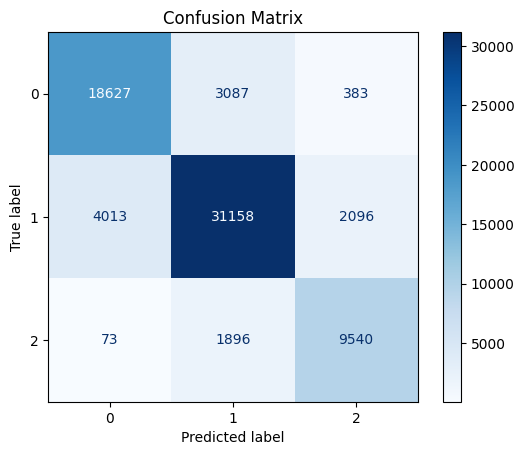

In [78]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### RF base

In [74]:
import numpy as np
from sklearn.datasets import load_iris  # Using Iris dataset for demonstration
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8171454371014165
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      5565
           1       0.84      0.81      0.82      9279
           2       0.79      0.76      0.77      2875

    accuracy                           0.82     17719
   macro avg       0.81      0.81      0.81     17719
weighted avg       0.82      0.82      0.82     17719

